In [1]:
# 오소리책 p.225~ k 평균 군집
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

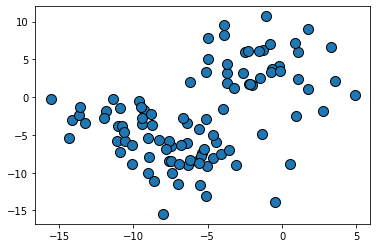

In [2]:
X, y = make_blobs(random_state = 1, cluster_std = 3)
mglearn.discrete_scatter(X[:, 0], X[:, 1])

In [3]:
# 비지도학습이니까 X값만 피팅시킴.
kmeans = KMeans(n_clusters=3).fit(X)

In [4]:
kmeans.labels_

array([1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1])

1 0
2 1
0 1
0 1
2 2
2 2
2 2
2 1
1 0
1 0
2 1
0 1
2 2
1 0
2 2
2 2
2 2
1 0
0 1
0 1
2 2
0 1
2 2
1 0
0 1
2 2
2 2
1 0
1 0
2 2
1 0
1 0
2 2
1 0
2 1
2 2
0 1
0 1
0 1
2 2
2 2
2 1
1 0
0 1
0 1
2 2
1 0
1 0
1 0
1 0
0 1
2 2
2 2
0 2
1 0
2 2
0 1
1 1
1 0
1 0
0 1
0 2
2 2
0 1
0 1
2 2
1 0
0 2
1 0
0 1
0 1
2 1
2 2
1 0
1 0
2 1
2 2
2 2
1 0
0 1
1 0
0 1
0 1
2 2
1 0
1 0
1 0
1 0
0 1
1 0
2 2
1 0
1 0
0 1
0 1
1 2
2 2
1 0
2 2
1 0


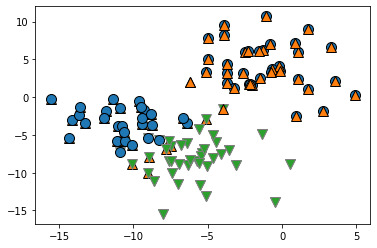

In [5]:
# kmeans 가 찾아낸 값과 실제 y값을 비교.
for i in range(len(y)):
    print(kmeans.labels_[i], y[i])
    
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_)

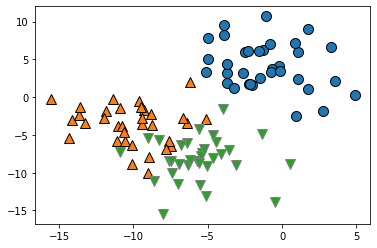

In [6]:
# 실제 y값의 분포
mglearn.discrete_scatter(X[:, 0], X[:,1], y)

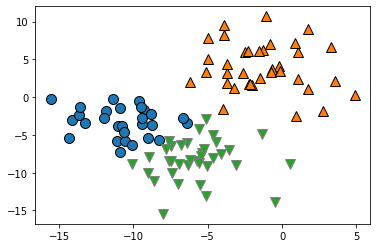

In [7]:
# 비지도학습모델 kmeans의 예측 결과.
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_)

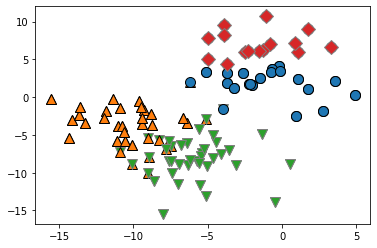

In [8]:
# 비지도학습의 문제점 => 우리가 데이터의 성격을 잘 파악하고 있어야 함.
# y값은 0, 1, 2로 세 가지의 class 만 있는 것이 맞음. 근데, 만약 4개의 답을 찾아오라고 말을 한다?
# 그럼 비지도 학습은 데이터의 y값이 뭔지 모르기 때문에 걍 막 찾아옴.(X값에만 피팅되어 있어서.)

kmeans = KMeans(n_clusters=4).fit(X)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_)

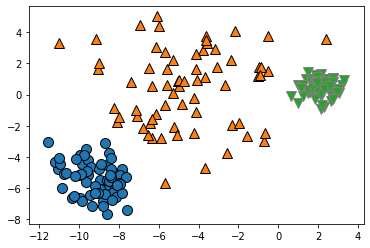

In [9]:
# 200개의 샘플 크기를 가진 분류용 가상 데이터를 생성.

X, y = make_blobs(n_samples= 200, random_state = 170,
                 cluster_std = [1, 2.5, 0.5])
mglearn.discrete_scatter(X[:,0], X[:,1], y)

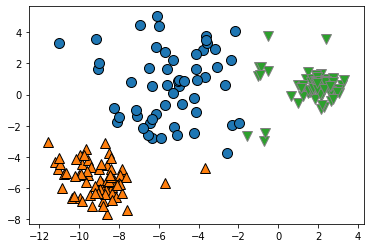

In [10]:
# kmeans데이터는 이 데이터셋에서는 부정확한 분류를 하는 것을 볼 수 있음.
# 그냥 세 개의 클러스터를 줬더니, 최대한 균등한 비율로 나누어 버림.
# 최근접이웃과 같은 군집으로 들어가기 때문.


y_pred = KMeans(n_clusters=3).fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], y_pred)

In [11]:
# 비지도학습은 리뷰 데이터 분석 등에 자주 사용되나, 실패 확률이 높은 모델임.(완벽한 예측을 하는 경우 적음.)
# 그래서 비지도 학습 결과만으로 무언가를 해석하는건 굉장히 나쁜 방법임.

In [12]:
# 오소리책 p.231~

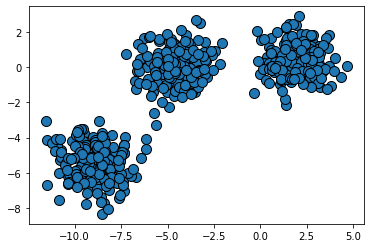

In [13]:
import numpy as np
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)
mglearn.discrete_scatter(X[:,0], X[:,1])



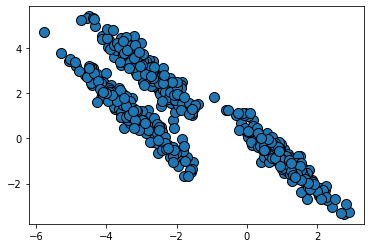

In [14]:
# 데이터가 길게 늘어지게 변경하는 것.
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)
mglearn.discrete_scatter(X[:,0], X[:,1])

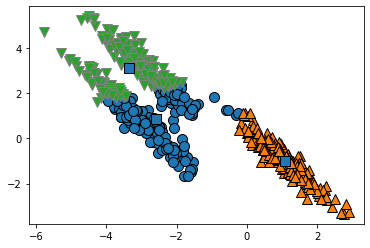

In [15]:
# 답이 없기 때문에(지도가 없었기 때문에) 제대로 된 예측 못함. 그냥 중심값을 기준으로 분류가 모여버림.
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_pred)
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                        markers = 's')

In [16]:
# kmeans의 중심. 그래프에 적용하면 어떤 값을 중심으로 모이는지 알 수 있다.
kmeans.cluster_centers_

array([[-2.59050892,  0.87997461],
       [ 1.07294254, -0.98167966],
       [-3.36538693,  3.14120184]])

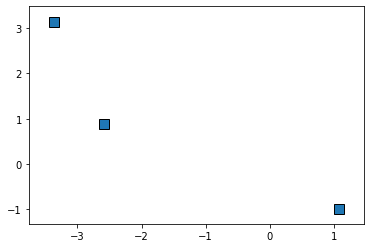

In [17]:
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                        markers = 's')

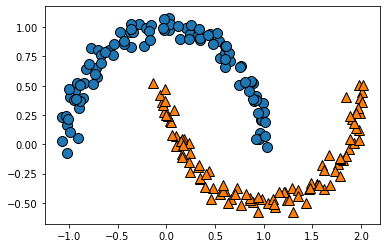

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

model = KMeans(n_clusters=2).fit(X)
y_ = model.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

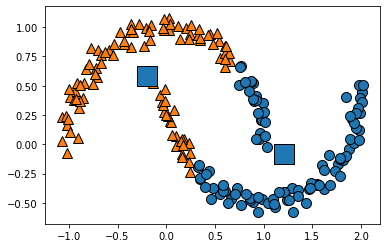

In [19]:
# y값을 주지 않았을 때(안 알려 줬을 때) => 데이터의 특성을 전혀 고려하지 않고 오로지 거리 기준으로 분류.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_)
mglearn.discrete_scatter(model.cluster_centers_[:, 0],
                         model.cluster_centers_[:, 1],
                        markers = 's', s = '20')

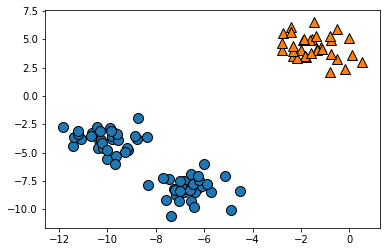

In [20]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 1)
agg_model = AgglomerativeClustering()        # 클러스터 개수 지정해 주지 않아도 알아서 나눔. 하지만 지정해 줄 수도 있다.
y_ = agg_model.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:, 1], y_)

In [21]:
# DBSCAN 클러스터링  // p. 245~

In [22]:
from sklearn.cluster import DBSCAN

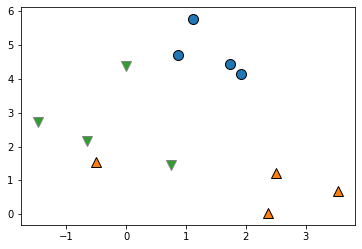

In [23]:
X, y = make_blobs(random_state = 0, n_samples = 12)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

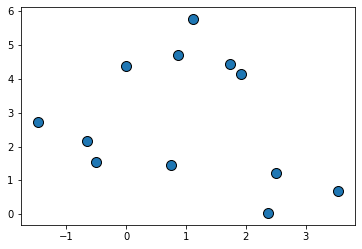

In [24]:
# dbscan 실행 결과 => 클러스터링을 하나도 못 했음.
# 이유는? => 우리가 dbscan을 할 때 매개변수설정을 안 했기 때문!
dbscan = DBSCAN()
y_ = dbscan.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1],y_)

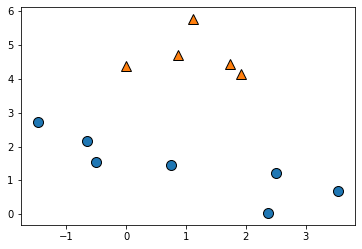

In [25]:
# eps => 범위.
# n_samples => 구분 기준 개수.(이거보다 eps내 개수 적으면 잡음 처리하세요!)

dbscan = DBSCAN(eps = 1.2)
y_ = dbscan.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1],y_)

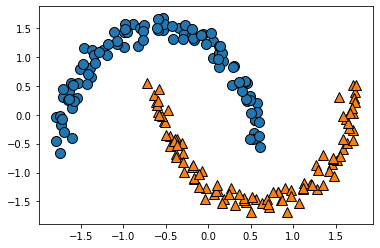

In [26]:
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=200, noise = 0.05, random_state = 0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
dbscan = DBSCAN(eps = 0.5)
y_ = dbscan.fit_predict(X_)
mglearn.discrete_scatter(X_[:,0], X_[:,1], y_);

In [27]:
y_ 
# eps = 0.05일때 전부 다 노이즈로 잡혔음.(범위가 너무 작아서, 모두 다 떨어져 있다고 본 것.)
# eps = 0.1일 때 => 군집이 늘어남.
# eps = 0.3일 때 => 분류가 잘 됨.

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [28]:
# 안경책 p.360~, kmeans 군집 마케팅 분석

In [29]:
# 데이터 다운 Online Retail Data Set 구글링해서 가져오기.

In [30]:
import pandas as pd
import math

In [31]:
retail_df = pd.read_excel('Online Retail.xlsx')
retail_df[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.shape

In [ ]:
# description, customer ID 에 빠진 데이터가 일부 있음을 알 수 있음.
retail_df.info()

In [ ]:
retail_df = retail_df[retail_df['Quantity']>0]      # 수량이 0이상인 것만 사용하기 위해 필터링 한 데이터를 덮어쓰겠음.
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]    # null 값 삭제.

In [35]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [36]:

retail_df.info()   # customerid 가 int로 잘 바뀜.
                   # 모든 값의 총계가 같으므로 null 값 없을 것이라고 예상됨.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [37]:
retail_df.isnull().sum()  # null 값 있는지 한번 더 확인.(description null 값 제거하지 않았으므로 null 값 있을 수도 있거든!)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
retail_df.shape

(397884, 8)

In [39]:
retail_df.drop_duplicates(inplace = True)

In [40]:
retail_df.shape

(392692, 8)

In [41]:
# 전처리 완료!

In [42]:
# 데이터 프레임으로 변환하는 것은, 모델링 할 때는 굳이 필요가 없음. 나중에 보고서 쓸때 하면 좋은거지.
# 따라서 skip~

In [43]:
len(retail_df['StockCode'].value_counts())

3665

In [44]:
len(retail_df['InvoiceNo'].value_counts())

18532

In [45]:
len(retail_df['CustomerID'].value_counts())

4338

In [46]:
# 국가별로 몇 개의 데이터?
retail_df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [47]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [48]:
# 기존 columns를 연산하여 새로운 column을 만듦.(단가 * 수량)
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']

In [49]:
retail_df[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [50]:
work_table = {
    'InvoiceNo':'count',
    'SaleAmount':'sum',
    'InvoiceDate':'max'
}

# 파이썬은 이렇게 다 만들어 놓고 한번에 전달.

customer_df = retail_df.groupby('CustomerID').agg(work_table)
customer_df = customer_df.reset_index()
customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [51]:
customer_df = customer_df.rename(columns={'InvoiceNo':'Freq', 'InvoiceDate' : 'ElapsedDays'})
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [52]:
# ElapsedDays
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011, 12, 10) - customer_df['ElapsedDays']

In [53]:
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00


In [54]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

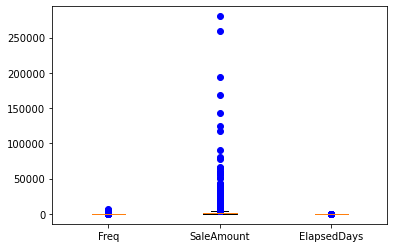

In [56]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'],
          customer_df['SaleAmount'],
          customer_df['ElapsedDays']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays']);

In [57]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

In [58]:
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805


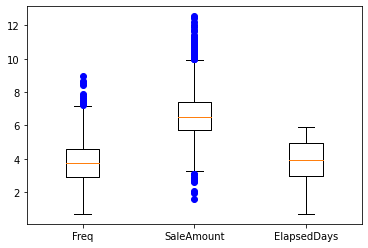

In [59]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'],
          customer_df['SaleAmount_log'],
          customer_df['ElapsedDays_log']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays']);

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [63]:
X = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

In [65]:
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805


In [66]:
X = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values
X

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [68]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(X)

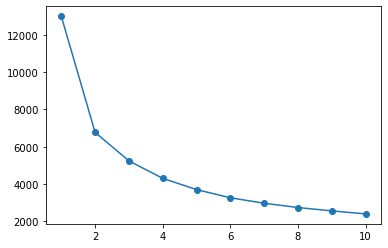

In [70]:
distortions = []
for i in range(1, 11):
    kmeans_model_i = KMeans(n_clusters = i, random_state = 0)
    kmeans_model_i.fit(X_s)
    distortions.append(kmeans_model_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o');

In [71]:
kmeans_k3 = KMeans(n_clusters = 3, random_state = 0)  # 고객 성향 별로 3개의 분류로 묶어주세요~~(cluster = 3)

In [72]:
y_ = kmeans_k3.fit_predict(X_s)

In [75]:
customer_df['ClusterLabel'] = y_

In [77]:
# 뭘 기준으로 분류한 건지는 몰라도, 3개의 계층으로 나눠 놨음.
customer_df[:10]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0
5,12352,85,2506.04,37,4.454347,7.826858,3.637586,2
6,12353,4,89.00,205,1.609438,4.499810,5.327876,0
7,12354,58,1079.40,233,4.077537,6.985087,5.455321,2
8,12355,13,459.40,215,2.639057,6.132096,5.375278,0
9,12356,59,2811.43,23,4.094345,7.941804,3.178054,1


In [145]:
from matplotlib import cm

In [152]:
def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)
    silhouette_values = silhouette_samples(X_features, Y_labels, metric = 'euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height = 1.0,
                edgecolor = 'none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper)/2.0)
        y_ax_lower += len(c_silhouettes)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Num of cluster : '+str(n_cluster) + '\n'+ 'silhouette Score: '+ str(round(silhouette_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [163]:
def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        
        plt.scatter(X_features[Y_labels == i, 0], X_features[Y_labels == i, 1],
                    marker = 'o', color = c_color, edgecolor = 'black', s = 50, label = 'cluster ' +str(i))
        
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i],
                       edgecolor = 'w', s = 200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

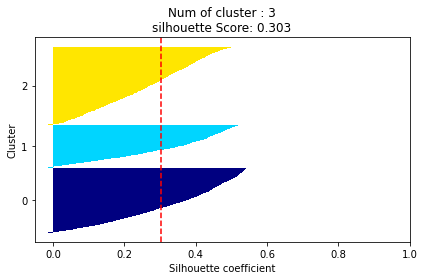

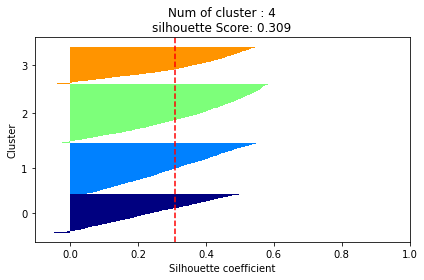

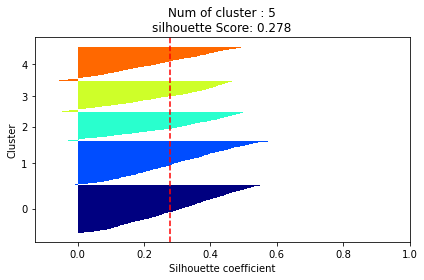

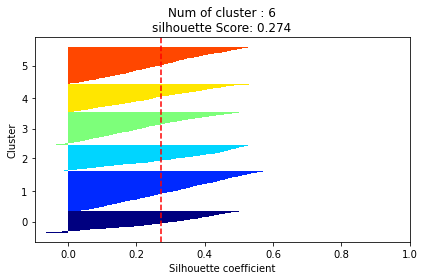

In [159]:
silhouetteViz(3, X_s)
silhouetteViz(4, X_s)
silhouetteViz(5, X_s)
silhouetteViz(6, X_s)

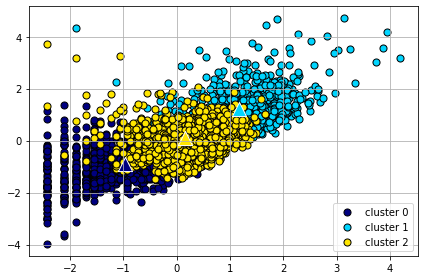

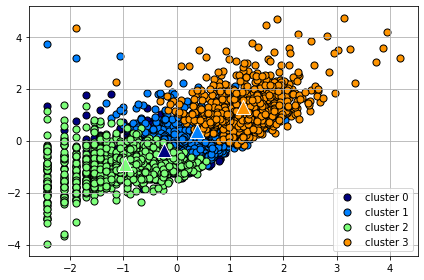

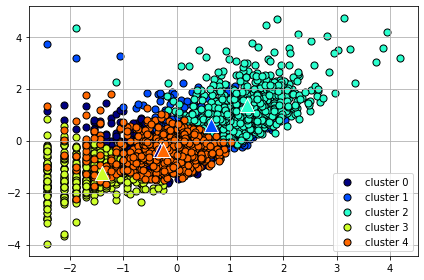

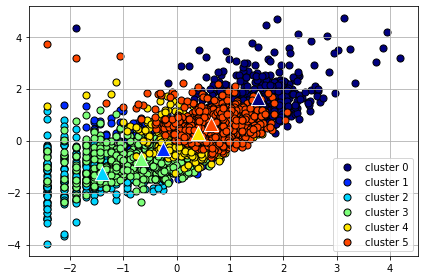

In [164]:
clusterScatter(3, X_s)
clusterScatter(4, X_s)
clusterScatter(5, X_s)
clusterScatter(6, X_s)

In [165]:
best_cluster = 4
kmeans = KMeans(n_clusters = best_cluster, random_state=0)
y_ = kmeans.fit_predict(X_s)

In [167]:
customer_df['ClusterLabel'] = y_
customer_df[:20]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2
5,12352,85,2506.04,37,4.454347,7.826858,3.637586,1
6,12353,4,89.00,205,1.609438,4.499810,5.327876,2
7,12354,58,1079.40,233,4.077537,6.985087,5.455321,1
8,12355,13,459.40,215,2.639057,6.132096,5.375278,2
9,12356,59,2811.43,23,4.094345,7.941804,3.178054,1


In [168]:
customer_df.to_csv('Online_REtail_Customer_Cluster.csv')

In [169]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [172]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'], axis = 1, inplace = False)

In [173]:
customer_cluster_df

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel
0,12346,1,77183.60,326,1
1,12347,182,4310.00,3,3
2,12348,31,1797.24,76,1
3,12349,73,1757.55,19,1
4,12350,17,334.40,311,2
...,...,...,...,...,...
4333,18280,10,180.60,278,2
4334,18281,7,80.82,181,2
4335,18282,12,178.05,8,0
4336,18283,721,2045.53,4,3
